<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/Text%20Corpus%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Cleaning & Corpus EDA**

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import nltk
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from string import digits

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unlabelled Discussion DATA.xlsx')
df.info()
df.isna().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


subReddit              1200
Date                   1200
Datetime               1200
Title                  1200
Body Text              1200
Top Comment            1200
Top Comment Reply 1    1200
Top Comment Reply 2    1200
Top Comment Reply 3    1200
Top Comment Reply 4    1200
dtype: int64

In [4]:
df.fillna('',inplace=True)

In [5]:
#RAW_EDA = ['subReddit','Title','Body Text','Top Comment', 'Top Comment Reply 1']

# **Join the relevant text columns to create a "Discussion" column to perform topic modelling on.**

In [6]:
#df_EDA = df[RAW_EDA].copy()
df['Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df['Raw Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1200 non-null   object        
 4   Body Text            1200 non-null   object        
 5   Top Comment          1200 non-null   object        
 6   Top Comment Reply 1  1200 non-null   object        
 7   Top Comment Reply 2  1200 non-null   object        
 8   Top Comment Reply 3  1200 non-null   object        
 9   Top Comment Reply 4  1200 non-null   object        
 10  Discussion           1200 non-null   object        
 11  Raw Discussion       1200 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 112.6+ KB


,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,Cheapest way to get a CGM without insurance? W...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,Libre 3 doesn’t stick I’ve used the Libre 3 fo...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,Frustrated with Libre 3 I just got off the pho...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,Libre 3 Graphs 3 weeks in The first graph was ...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,Confused by GMI on Libre 3 I'm finding myself ...,Confused by GMI on Libre 3 I'm finding myself ...


In [7]:
df['Discussion'] = df['Discussion'].str.lower()
# df['Body Text'] = df['Body Text'].str.lower()
# df['Top Comment'] = df['Top Comment'].str.lower()
# df['Top Comment Reply 1'] = df['Top Comment Reply 1'].str.lower()
# df['Top Comment Reply 2'] = df['Top Comment Reply 2'].str.lower()
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way to get a cgm without insurance? w...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre 3 i just got off the pho...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre 3 graphs 3 weeks in the first graph was ...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused by gmi on libre 3 i'm finding myself ...,Confused by GMI on Libre 3 I'm finding myself ...


In [8]:
def clean_text_1(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    # Remove remaining tokens that are not alphabetic (including numbers and symbols)
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    # Join the list of words into a single string
    return ' '.join(words)

In [9]:
# df['Discussion'].apply(lambda x: clean_text_1(x))
df['Discussion'] = df['Discussion'].apply(clean_text_1)
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...


In [10]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)


    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text


In [11]:
df['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...


In [12]:
def remove_numbers(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)



    return text

In [13]:
# def remove_digits(text):
#   remove_digits = str.maketrans('', '', digits)
#   res = text.translate(remove_digits)

#   return text

In [14]:
# def remove_digits(text):


#     return re.sub(r'\d+', '', text)

In [15]:
df['Discussion'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)
#df['Discussion'].apply(lambda x: remove_digits(x))
df = df[df['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [16]:
# df['Discussion'].head()
df
df.to_excel('/content/drive/MyDrive/Colab Notebooks/CleanText_1.xlsx')

In [17]:
df.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Raw Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,Cheapest way to get a CGM without insurance? W...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,Libre 3 doesn’t stick I’ve used the Libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,Frustrated with Libre 3 I just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,Libre 3 Graphs 3 weeks in The first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,,,,,,confused gmi libre finding myself confused the...,Confused by GMI on Libre 3 I'm finding myself ...


In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-24-ccda5c8fbe5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='subReddit', y='Word Count', inner='box', palette='Dark2')


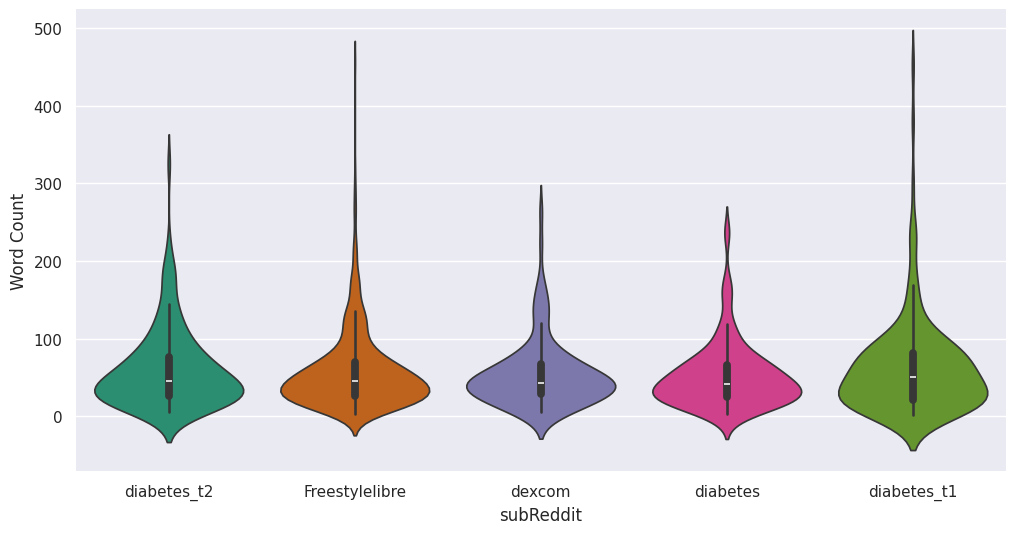

In [24]:
df['Word Count']= df['Discussion'].apply(lambda text: len(str(text).split()))
figsize = (12, 1.2 * len(df['subReddit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='subReddit', y='Word Count', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

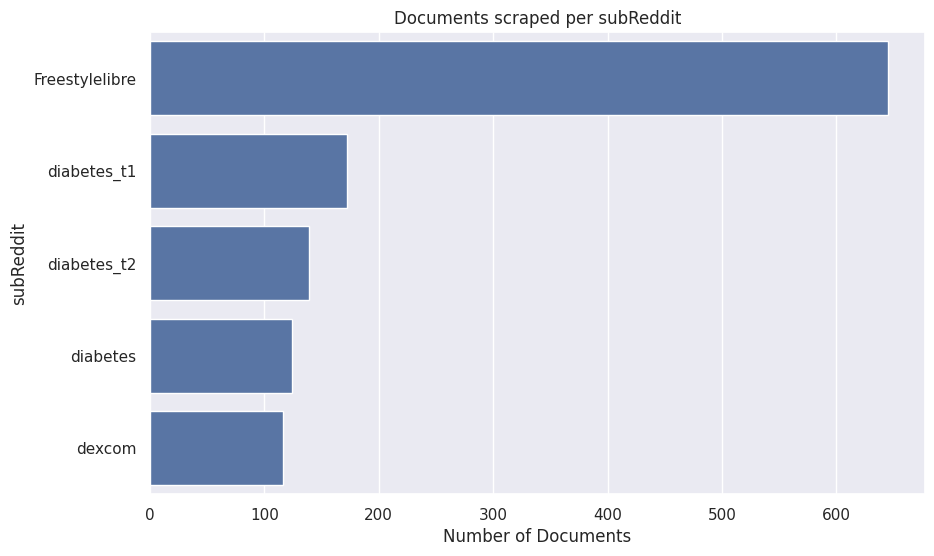

In [19]:
subReddit_counts = df['subReddit'].value_counts()

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='subReddit', data=df, order = subReddit_counts.index)

# Labeling the plot
plt.title('Documents scraped per subReddit')
plt.xlabel('Number of Documents')
plt.ylabel('subReddit')

# Show the plot
plt.show()

In [25]:
# df['Word Count']= df['Discussion'].apply(lambda text: len(str(text).split()))
# stats_df = df.groupby('subReddit')['Word Count'].agg(['mean','max', 'min']).reset_index()
# #using pandas melt function to create word count stats in a long format
# melted_stats_df = pd.melt(stats_df, id_vars='subReddit', value_vars=['mean'])
# sns.set(style="darkgrid")
# plt.figure(figsize=(10, 6))
# sns.barplot(x='value', y='subReddit', hue='variable', data=melted_stats_df)
# #titles
# plt.title('Average Word Count of Documents per subReddit')
# plt.xlabel('Average Word Count')
# plt.ylabel('subReddit')

# plt.legend()
# plt.show()

In [28]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [29]:
stopwords = set(STOPWORDS)

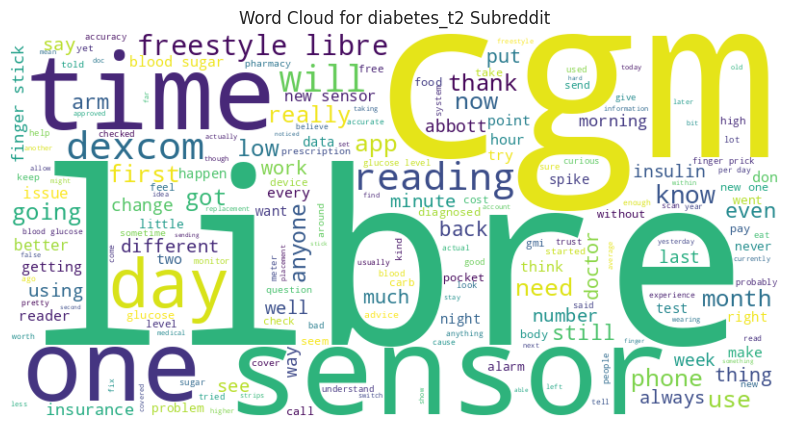

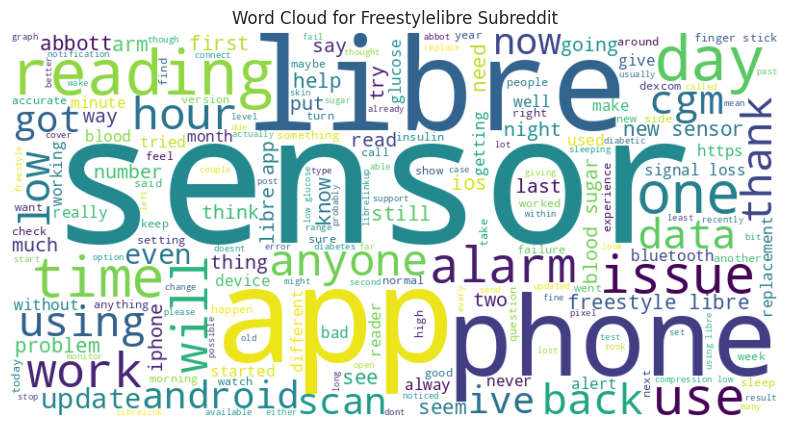

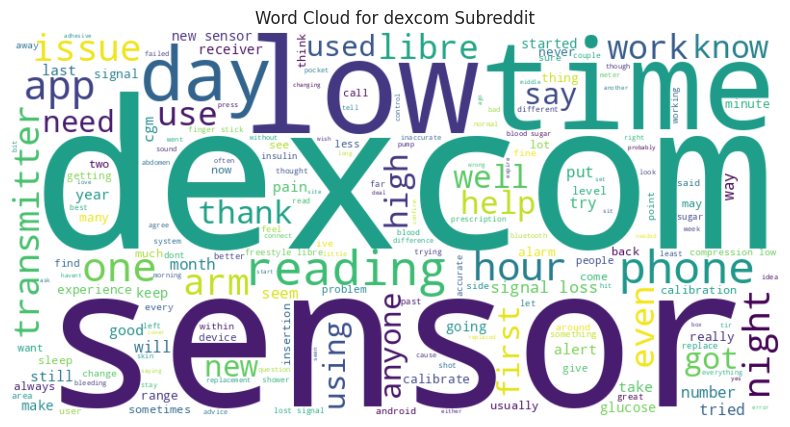

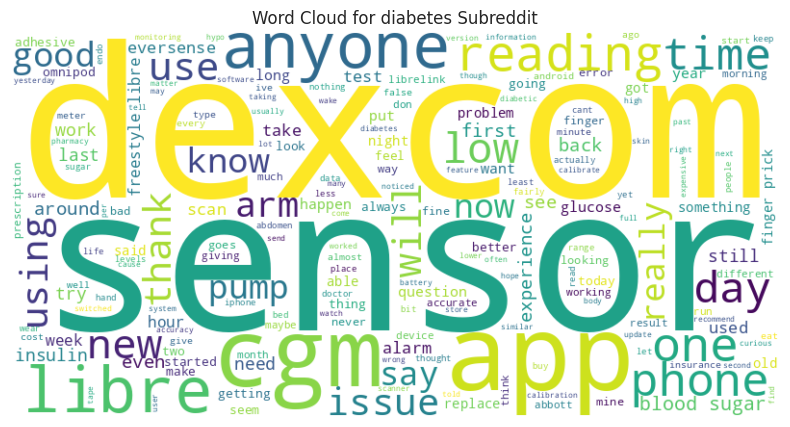

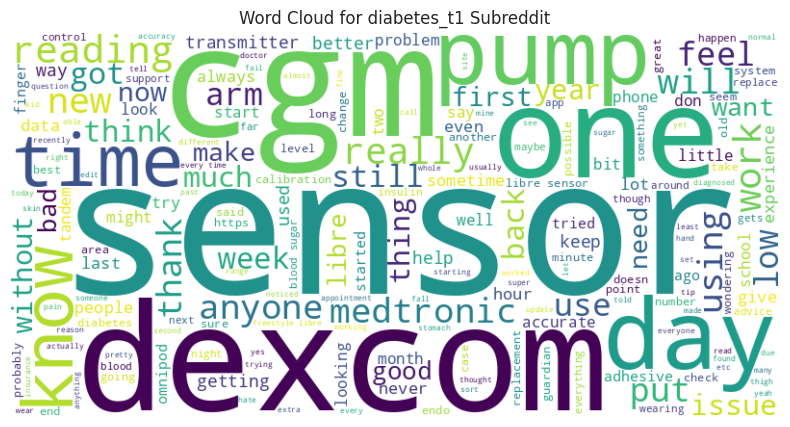

In [30]:
for subreddit in df['subReddit'].unique():
    #combining the text from each discussion record
    text = " ".join(discussion for discussion in df[df['subReddit'] == subreddit]['Discussion'])
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords=stopwords).generate(text)

    #display the plots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {subreddit} Subreddit')
    plt.axis('off')
    plt.show()


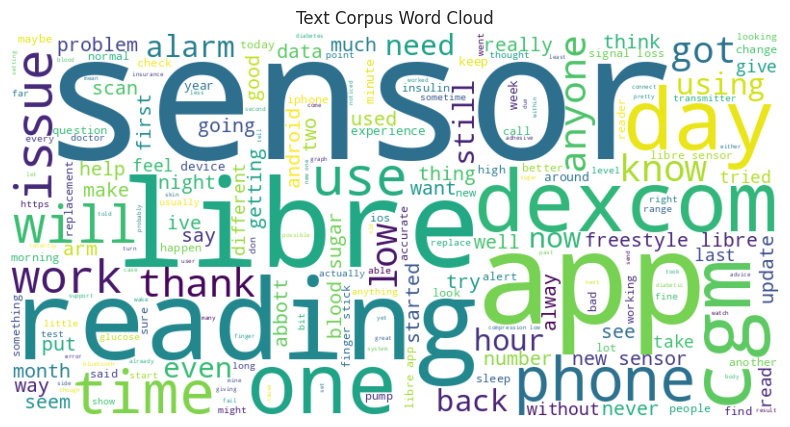

In [31]:
wordcloud_text = " ".join(discussion for discussion in df['Discussion'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords=stopwords).generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Text Corpus Word Cloud')
plt.axis('off')
plt.show()

In [32]:
# df.to_excel('/content/drive/MyDrive/Colab Notebooks/Stage1NLP.xlsx')